# Skimlit project

## Get the data

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
!pip install -q tensorflow==2.15
import os
os.kill(os.getpid(), 9)

In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

## Preprocess the data

In [ ]:
def get_lines(filename):
  with open(filename,'r') as f:
    lines = f.readlines()
  return lines

In [ ]:
train_lines = get_lines(filenames[0])
test_lines = get_lines(filenames[1])
valid_lines = get_lines(filenames[2])

In [ ]:
train_lines[:10]

['###24290286\n',
 'BACKGROUND\tIgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .\n',
 'BACKGROUND\tIt is not clear whether these patients would benefit from antifungal treatment .\n',
 'OBJECTIVE\tWe sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus .\n',
 'METHODS\tAsthmatic patients who were IgE sensitized to A fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .\n',
 'METHODS\tPrimary outcomes were improvement in quality of life at the end of the treatment period and a reduction in the number of severe exacerbations over the @ months of the study .\n',
 'RESULTS\tSixty-five patients were randomized .

In [ ]:
test_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
valid_lines[:10]

['###24845963\n',
 'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n',
 'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .\n',
 'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .\n',
 'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .\n',
 "RESULTS\tThe percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .\n",
 'RE

In [ ]:
def preprocess_text_with_line(filename):
  input_lines = get_lines(filename)
  abstract_lines = ''
  abstract_samples = []
  for line in input_lines:
    if line.startswith('###'):
      abstract_lines = ''
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split('\t')
        line_data['target'] = target_text_split[0]
        line_data['text'] = target_text_split[1].lower()
        line_data['line_number'] = abstract_line_number
        line_data['total_lines'] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line(filenames[0])
val_samples = preprocess_text_with_line(filenames[2])
test_samples = preprocess_text_with_line(filenames[1])

In [ ]:
train_samples[:10]

[{'target': 'BACKGROUND',
  'text': 'ige sensitization to aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
  'line_number': 0,
  'total_lines': 9},
 {'target': 'BACKGROUND',
  'text': 'it is not clear whether these patients would benefit from antifungal treatment .',
  'line_number': 1,
  'total_lines': 9},
 {'target': 'OBJECTIVE',
  'text': 'we sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are ige sensitized to a fumigatus .',
  'line_number': 2,
  'total_lines': 9},
 {'target': 'METHODS',
  'text': 'asthmatic patients who were ige sensitized to a fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .',
  'line_number': 3,
  'total_lines': 9},
 {'targe

In [ ]:
len(train_samples)

30212

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head(10)

,target,text,line_number,total_lines
0,BACKGROUND,ige sensitization to aspergillus fumigatus and...,0,9
1,BACKGROUND,it is not clear whether these patients would b...,1,9
2,OBJECTIVE,we sought to determine whether a @-month cours...,2,9
3,METHODS,asthmatic patients who were ige sensitized to ...,3,9
4,METHODS,primary outcomes were improvement in quality o...,4,9
5,RESULTS,sixty-five patients were randomized .,5,9
6,RESULTS,fifty-nine patients started treatment ( @ rece...,6,9
7,RESULTS,fifty-six patients took the full @ months of m...,7,9
8,RESULTS,"between the voriconazole and placebo groups , ...",8,9
9,CONCLUSIONS,we were unable to show a beneficial effect of ...,9,9


In [ ]:
train_df.target.value_counts()

,count
target,
METHODS,9964
RESULTS,9841
CONCLUSIONS,4582
BACKGROUND,3449
OBJECTIVE,2376


<Axes: >

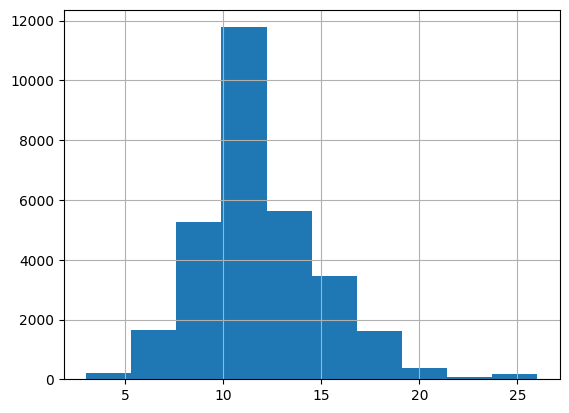

In [ ]:
train_df.total_lines.hist(bins=10)

In [ ]:
train_sentences = train_df.text.to_list()
val_sentences = val_df.text.to_list()
test_sentences = test_df.text.to_list()

In [ ]:
train_sentences[:5]

['ige sensitization to aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .',
 'it is not clear whether these patients would benefit from antifungal treatment .',
 'we sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are ige sensitized to a fumigatus .',
 'asthmatic patients who were ige sensitized to a fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .',
 'primary outcomes were improvement in quality of life at the end of the treatment period and a reduction in the number of severe exacerbations over the @ months of the study .']

### Make numeric labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df.target.to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df.target.to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df.target.to_numpy().reshape(-1,1))

In [ ]:
train_labels_one_hot, train_labels_one_hot.shape

(array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]),
 (30212, 5))

### Label encode labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df.target.to_numpy())
val_labels_encoded = label_encoder.transform(val_df.target.to_numpy())
test_labels_encoded = label_encoder.transform(test_df.target.to_numpy())

In [ ]:
train_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Starting a series of experimentation

### Model 0: Base model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
  ('tfidf', TfidfVectorizer()),
  ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
base_model_preds = model_0.predict(val_sentences)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
base_model_results = calculate_results(y_true=val_labels_encoded,
                                      y_pred=base_model_preds)
base_model_results

{'accuracy': 67.55931640949062,
 'precision': 0.6707354792180861,
 'recall': 0.6755931640949062,
 'f1': 0.6337858496380698}

### Preparing the data to the deep learning model (tokenization, embedding)

In [ ]:
sen_len = [len(sentence.split()) for sentence in train_sentences]

In [ ]:
import numpy as np

avg_sen_len = np.mean(sen_len)
avg_sen_len

26.42244803389382

Text(0.5, 1.0, 'Sentence length distribution')

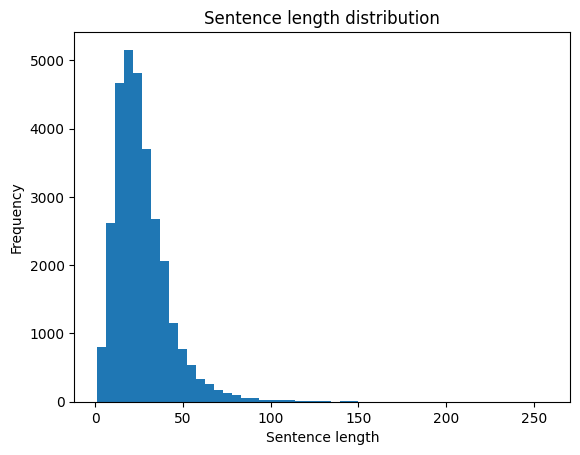

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sen_len, bins=50)
plt.xlabel('Sentence length')
plt.ylabel('Frequency')
plt.title('Sentence length distribution')

In [ ]:
# How long of a sentence length covers 95% of the samples?
output_seq_len = int(np.percentile(sen_len, 95))
output_seq_len

55

In [ ]:
max(sen_len)

258

In [ ]:
max_tokens = 25000

from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_sequence_length = output_seq_len)

text_vectorizer.adapt(train_sentences)

In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Top 5 words: {rct_20k_text_vocab[:5]}")
print(f'Bottom 5 words: {rct_20k_text_vocab[-5:]}')

Number of words in vocab: 25000
Top 5 words: ['', '[UNK]', 'the', 'and', 'of']
Bottom 5 words: ['aberdeen', 'abductor', 'abducting', 'abducted', 'abduct']


In [ ]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 25000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 25000}

In [ ]:
# Create embedding layer
import tensorflow as tf

token_embed = tf.keras.layers.Embedding(
    input_dim=len(rct_20k_text_vocab),
    output_dim=128,
    mask_zero=True, # it helps to efficiently compute values when there are many zeros in your input
    name='token_embedding'
)

In [ ]:
# Show example embedding
import random
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

sample_embed = token_embed(text_vectorizer([random_sentence]))
sample_embed

Original text:
to examine the relationship among adiposity indicators , asthma , and atopy in puerto rican children , and to assess whether atopy mediates the obesity-asthma association .      

Embedded version:


<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[ 0.04539371, -0.00112219, -0.0278301 , ...,  0.01444307,
         -0.04682182, -0.03160182],
        [-0.02241697, -0.01333358,  0.01152861, ..., -0.0227553 ,
          0.00878977,  0.03260754],
        [-0.04975522, -0.03050392, -0.00366708, ...,  0.03057126,
         -0.01295557, -0.0364958 ],
        ...,
        [ 0.00107072, -0.04372803, -0.01232637, ..., -0.04646069,
         -0.04583604,  0.04039023],
        [ 0.00107072, -0.04372803, -0.01232637, ..., -0.04646069,
         -0.04583604,  0.04039023],
        [ 0.00107072, -0.04372803, -0.01232637, ..., -0.04646069,
         -0.04583604,  0.04039023]]], dtype=float32)>

### Creating datasets (making sure our data loads as fast as possible)

In [ ]:
# Turn our data into TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

In [ ]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
# Take the TensorSliceDataset and turn them into prefetched dataset
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

### Model 1: Conv1D with token embedding

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv1D, GlobalAveragePooling1D, Embedding, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = token_embed(x)
x = Conv1D(filters=64, kernel_size=5, padding='same', activation='relu')(x)
x = GlobalAveragePooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model_1 = Model(inputs, outputs, name='model_1_conv1d')

In [ ]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_1_history = model_1.fit(train_dataset,
                              epochs=5,
                              validation_data=valid_dataset,
                              validation_steps=int(0.15 * len(valid_dataset)),
                              steps_per_epoch=int(0.6 * len(train_dataset)))

Epoch 1/5
567/567 [==============================] - 31s 53ms/step - loss: 0.9384 - accuracy: 0.6051 - val_loss: 0.6884 - val_accuracy: 0.7258
Epoch 2/5
377/567 [==================>...........] - ETA: 10s - loss: 0.7014 - accuracy: 0.7257

567/567 [==============================] - 22s 39ms/step - loss: 0.7013 - accuracy: 0.7258 - val_loss: 0.6359 - val_accuracy: 0.7520


In [ ]:
model_1_preds = model_1.predict(valid_dataset)

942/942 [==============================] - 5s 5ms/step


In [ ]:
model_1_preds

array([[3.8745075e-01, 1.4641698e-01, 1.1082184e-01, 3.3943895e-01,
        1.5871532e-02],
       [9.1511428e-02, 2.8431429e-02, 7.0504928e-01, 1.5581231e-01,
        1.9195609e-02],
       [3.0321913e-04, 6.5925031e-04, 9.2470974e-01, 2.5562115e-04,
        7.4072219e-02],
       ...,
       [1.8345440e-03, 5.5144127e-02, 3.4527216e-02, 5.7707110e-04,
        9.0791708e-01],
       [6.5890662e-03, 6.1160944e-02, 6.9782972e-02, 1.6528671e-03,
        8.6081415e-01],
       [2.8578026e-02, 5.0379276e-01, 2.8662464e-02, 1.6559998e-02,
        4.2240679e-01]], dtype=float32)

In [ ]:
model_1_preds_classes = tf.argmax(model_1_preds, axis=1)
model_1_preds_classes

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 2, 2, ..., 4, 4, 1])>

In [ ]:
model_1_results = calculate_results(y_true=val_labels_encoded,
                                      y_pred=model_1_preds_classes)
model_1_results

{'accuracy': 75.0854488136718,
 'precision': 0.7463680847919892,
 'recall': 0.7508544881367181,
 'f1': 0.7479694922502667}

### Model 2: Feature extraction with pretrained token embedding

In [ ]:
import tensorflow_hub as hub

embedding_layer = hub.KerasLayer('https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2',
                                  trainable=False,
                                  name='universal_sentence_encoder')

In [ ]:
# show the example of pretrained embedding layer
embedding_layer([random_sentence]), embedding_layer([random_sentence]).shape

(<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
 array([[ 0.07609636,  0.04818064, -0.04861105, -0.04891174, -0.0396698 ,
          0.03704177, -0.06056895, -0.0314285 , -0.07699487,  0.00180255,
          0.05523098,  0.05251399,  0.02575087, -0.01836486,  0.00594799,
         -0.05409911, -0.08052291, -0.04682371,  0.05228481,  0.0165302 ,
          0.07120072, -0.02443016,  0.03304237,  0.02141403, -0.03611059,
          0.03691307,  0.05304804,  0.07491252,  0.00321516,  0.01779241,
          0.05754081,  0.02267117,  0.02693938, -0.0212906 , -0.02033716,
         -0.03718795, -0.00573815, -0.06370968,  0.08198627, -0.01580137,
         -0.05504661,  0.01148763, -0.05738477, -0.0116011 , -0.04321822,
         -0.04702357,  0.01052607, -0.05832693,  0.02691469, -0.01341154,
          0.0116087 ,  0.07341028,  0.05279656,  0.01380245, -0.00902109,
         -0.04180486, -0.02380744,  0.03818698, -0.01322383, -0.00479836,
          0.02975138, -0.07139466, -0.07432623, -0.02997192, 

In [ ]:
inputs = Input(shape=[], dtype='string')
x = embedding_layer(inputs)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model_2 = Model(inputs, outputs, name='model_2_pretrained_embedding')

In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_2_history = model_2.fit(train_dataset,
                              epochs=5,
                              validation_data=valid_dataset,
                              validation_steps=int(0.15 * len(valid_dataset)))

Epoch 1/5
945/945 [==============================] - 13s 11ms/step - loss: 0.9062 - accuracy: 0.6484 - val_loss: 0.7911 - val_accuracy: 0.6973
Epoch 2/5
945/945 [==============================] - 15s 16ms/step - loss: 0.7745 - accuracy: 0.7021 - val_loss: 0.7564 - val_accuracy: 0.7070
Epoch 3/5
945/945 [==============================] - 11s 12ms/step - loss: 0.7396 - accuracy: 0.7178 - val_loss: 0.7344 - val_accuracy: 0.7183
Epoch 4/5
945/945 [==============================] - 8s 9ms/step - loss: 0.7113 - accuracy: 0.7282 - val_loss: 0.7153 - val_accuracy: 0.7272
Epoch 5/5
945/945 [==============================] - 8s 9ms/step - loss: 0.6907 - accuracy: 0.7368 - val_loss: 0.7043 - val_accuracy: 0.7281


In [ ]:
model_2_preds = model_2.predict(valid_dataset)
model_2_preds = tf.argmax(model_2_preds, axis=1)
model_2_results = calculate_results(y_true=val_labels_encoded,
                                      y_pred=model_2_preds)
model_2_results

942/942 [==============================] - 8s 8ms/step


{'accuracy': 72.8953044632487,
 'precision': 0.7262308318879728,
 'recall': 0.7289530446324871,
 'f1': 0.7263649199411802}

In [ ]:
model_1_results

{'accuracy': 75.0854488136718,
 'precision': 0.7463680847919892,
 'recall': 0.7508544881367181,
 'f1': 0.7479694922502667}

### Model 3: Conv1D with character embeddings

In [ ]:
def split_chars(text):
  return ' '.join(list(text))

In [ ]:
train_chars = [split_chars(text) for text in train_sentences]
val_chars = [split_chars(text) for text in val_sentences]
test_chars = [split_chars(text) for text in test_sentences]
train_chars = np.array(train_chars).reshape(-1, 1)
val_chars = np.array(val_chars).reshape(-1, 1)

In [ ]:
train_chars[:5]

array([['i g e   s e n s i t i z a t i o n   t o   a s p e r g i l l u s   f u m i g a t u s   a n d   a   p o s i t i v e   s p u t u m   f u n g a l   c u l t u r e   r e s u l t   a r e   c o m m o n   i n   p a t i e n t s   w i t h   r e f r a c t o r y   a s t h m a   .'],
       ['i t   i s   n o t   c l e a r   w h e t h e r   t h e s e   p a t i e n t s   w o u l d   b e n e f i t   f r o m   a n t i f u n g a l   t r e a t m e n t   .'],
       ['w e   s o u g h t   t o   d e t e r m i n e   w h e t h e r   a   @ - m o n t h   c o u r s e   o f   v o r i c o n a z o l e   i m p r o v e d   a s t h m a - r e l a t e d   o u t c o m e s   i n   p a t i e n t s   w i t h   a s t h m a   w h o   a r e   i g e   s e n s i t i z e d   t o   a   f u m i g a t u s   .'],
       ['a s t h m a t i c   p a t i e n t s   w h o   w e r e   i g e   s e n s i t i z e d   t o   a   f u m i g a t u s   w i t h   a   h i s t o r y   o f   a t   l e a s t   @   s e v e r e   e x a c e r b a t i

In [ ]:
# What's the average character length?
chars_lens = [len(str(char[0]).split()) for char in train_chars]
avg_chars_len = np.mean(chars_lens)
print(avg_chars_len)

123.76866807890904


Text(0.5, 1.0, 'Character length distribution')

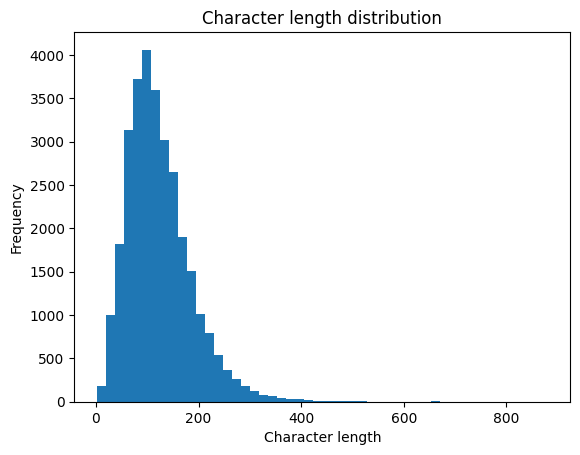

In [ ]:
# Check the distribution
plt.hist(chars_lens, bins=50)
plt.xlabel('Character length')
plt.ylabel('Frequency')
plt.title('Character length distribution')

In [ ]:
output_seq_char_len = int(np.percentile(chars_lens, 95))
output_seq_char_len

240

In [ ]:
# Get all keyboard character
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation + ' '
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

In [ ]:
num_char_tokens = len(alphabet)
char_vectorizer = TextVectorization(max_tokens=num_char_tokens,
                                    output_sequence_length=output_seq_char_len,
                                    name='char_vectorizer')
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
char_vocab[:5]

['', '[UNK]', 'e', 't', 'i']

In [ ]:
len(char_vocab), len(alphabet)

(28, 69)

In [ ]:
# Create an embedding
char_embed = tf.keras.layers.Embedding(
    input_dim=len(char_vocab),
    output_dim=25,
    mask_zero=True,
    name='char_embedding'
)

In [ ]:
inputs = Input(shape=(1,), dtype='string')
x = char_vectorizer(inputs)
x = char_embed(x)
x = Conv1D(filters=64, kernel_size=5, padding='same', activation='relu')(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model_3 = Model(inputs, outputs, name='model_3_char_embedding')

In [ ]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),

                metrics=['accuracy'])

In [ ]:
# Create char level dataset
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
valid_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_3_history = model_3.fit(train_char_dataset,
                              epochs=5,
                              validation_data=valid_char_dataset,

                              validation_steps=int(0.15 * len(valid_char_dataset)))

Epoch 1/5
945/945 [==============================] - 14s 14ms/step - loss: 1.1792 - accuracy: 0.5005 - val_loss: 0.9839 - val_accuracy: 0.6024
Epoch 2/5
945/945 [==============================] - 13s 14ms/step - loss: 0.9391 - accuracy: 0.6216 - val_loss: 0.9234 - val_accuracy: 0.6299
Epoch 3/5
945/945 [==============================] - 13s 14ms/step - loss: 0.8655 - accuracy: 0.6546 - val_loss: 0.8919 - val_accuracy: 0.6438
Epoch 4/5
945/945 [==============================] - 13s 14ms/step - loss: 0.8192 - accuracy: 0.6761 - val_loss: 0.8588 - val_accuracy: 0.6627
Epoch 5/5
945/945 [==============================] - 14s 15ms/step - loss: 0.7889 - accuracy: 0.6894 - val_loss: 0.8355 - val_accuracy: 0.6724


In [ ]:
model_3_preds = model_3.predict(valid_char_dataset)
model_3_preds = tf.argmax(model_3_preds, axis=1)
model_3_results = calculate_results(y_true=val_labels_encoded,
                                      y_pred=model_3_preds)

model_3_results

942/942 [==============================] - 4s 4ms/step


{'accuracy': 66.50738344118136,
 'precision': 0.6901105651932414,
 'recall': 0.6650738344118136,
 'f1': 0.6660320956184371}

### Model 4: Combining pretrained token embedding with character embedding

In [ ]:
token_inputs = Input(shape=[], dtype='string')
token_embedding = embedding_layer(token_inputs)
token_output = Dense(128, activation='relu')(token_embedding)
token_model = Model(token_inputs, token_output)

char_inputs = Input(shape=(1,), dtype='string')
char_vectors = char_vectorizer(char_inputs)
char_embedding = char_embed(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(char_embedding)
char_output = Dense(128, activation='relu')(char_bi_lstm)
char_model = Model(char_inputs, char_output)

token_char_concat = tf.keras.layers.Concatenate()([token_model.output, char_model.output])
x = Dropout(0.5)(token_char_concat)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model_4 = Model([token_model.input, char_model.input], outputs, name='model_4_token_char_embedding')

In [ ]:
model_4.summary()

Model: "model_4_token_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 240)                  0         ['input_16[0][0]']            
 rization)                                                                                        
                                                                                                  
 input_15 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 char_embedding (Embedding)  (None, 240, 25)              700       ['c

#### Plotting and visually exploring different data inputs

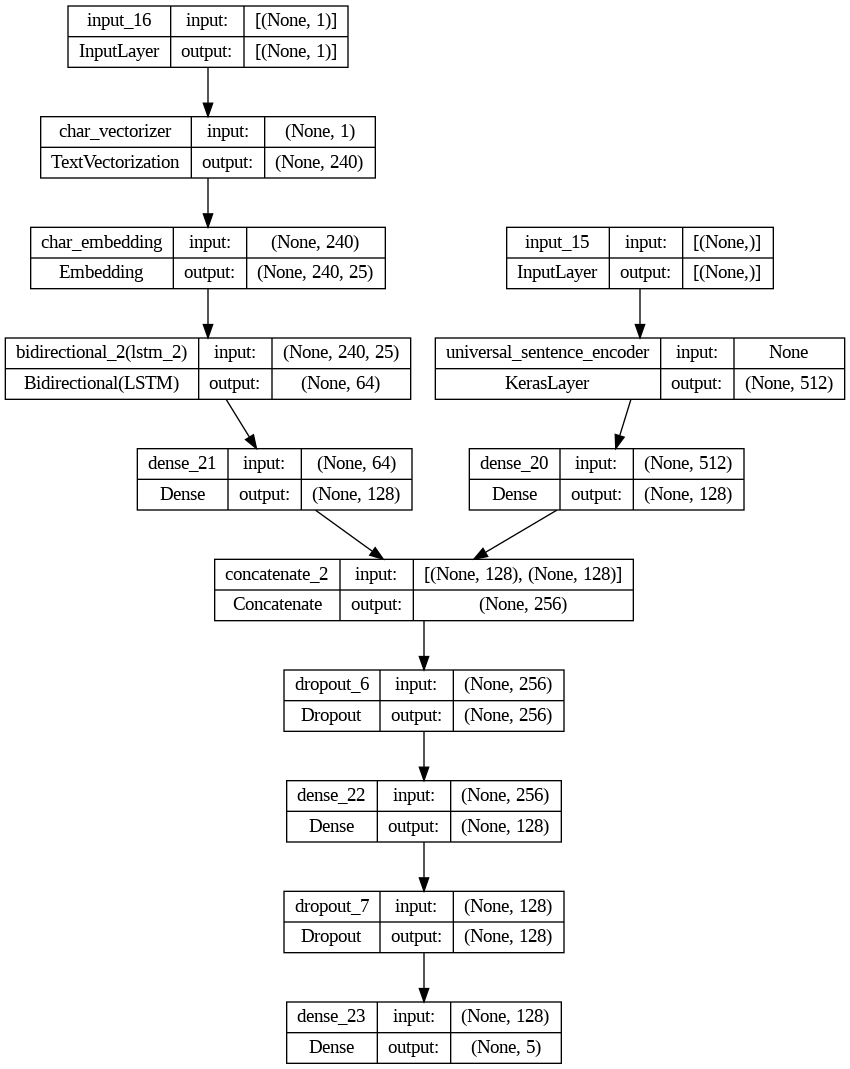

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [ ]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#### Combining token and character data into a tf.data Dataset

In [ ]:
train_token_char_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_token_char_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_dataset = tf.data.Dataset.zip((train_token_char_data, train_token_char_labels))
train_token_char_dataset = train_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

valid_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
valid_token_char_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
valid_token_char_dataset = tf.data.Dataset.zip((valid_token_char_data, valid_token_char_labels))
valid_token_char_dataset = valid_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_token_char_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_token_char_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_token_char_dataset = tf.data.Dataset.zip((test_token_char_data, test_token_char_labels))
test_token_char_dataset = test_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_token_char_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 1), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
model_4_history = model_4.fit(train_token_char_dataset,
                              epochs=1,
                              validation_data=valid_token_char_dataset,
                              validation_steps=int(0.15 * len(valid_token_char_dataset)))

Epoch 1/5
945/945 [==============================] - 256s 264ms/step - loss: 0.9066 - accuracy: 0.6426 - val_loss: 0.7368 - val_accuracy: 0.7125
Epoch 2/5
945/945 [==============================] - 253s 268ms/step - loss: 0.7426 - accuracy: 0.7201 - val_loss: 0.6915 - val_accuracy: 0.7327
Epoch 3/5
945/945 [==============================] - 241s 255ms/step - loss: 0.6981 - accuracy: 0.7357 - val_loss: 0.6642 - val_accuracy: 0.7456
Epoch 4/5
945/945 [==============================] - 242s 256ms/step - loss: 0.6637 - accuracy: 0.7507 - val_loss: 0.6538 - val_accuracy: 0.7480
Epoch 5/5
945/945 [==============================] - 240s 254ms/step - loss: 0.6406 - accuracy: 0.7581 - val_loss: 0.6448 - val_accuracy: 0.7469


In [ ]:
model_4_preds = model_4.predict(valid_token_char_dataset)
model_4_preds = tf.argmax(model_4_preds, axis=1)
model_4_results = calculate_results(y_true=val_labels_encoded,
                                      y_pred=model_4_preds)
model_4_results

942/942 [==============================] - 56s 57ms/step


{'accuracy': 75.01908080305293,
 'precision': 0.7533646862961455,
 'recall': 0.7501908080305293,
 'f1': 0.746851115027539}

### Model 5: model_4 + Positional embedding

In [ ]:
train_df['line_number'].value_counts()

,count
line_number,
0,2500
1,2500
2,2500
3,2500
4,2497
5,2488
6,2461
7,2384
8,2247


<Axes: ylabel='Frequency'>

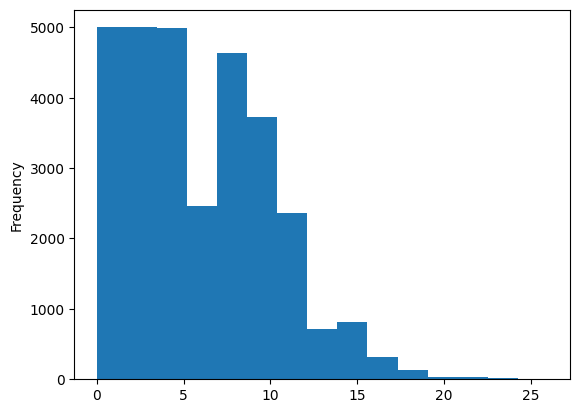

In [ ]:
train_df.line_number.plot.hist(bins=15)

In [ ]:
train_line_number_one_hot = tf.one_hot(train_df.line_number.to_numpy(), depth=15)
train_line_number_one_hot[:10], train_line_number_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>,
 TensorShape([30212, 15]))

In [ ]:
val_line_number_one_hot = tf.one_hot(val_df.line_number.to_numpy(), depth=15)
test_line_number_one_hot = tf.one_hot(test_df.line_number.to_numpy(), depth=15)

In [ ]:
train_df['total_lines'].value_counts()

,count
total_lines,
11,4284
10,3751
12,3744
9,3330
13,3066
14,2565
8,1935
15,1920
16,1547


<Axes: ylabel='Frequency'>

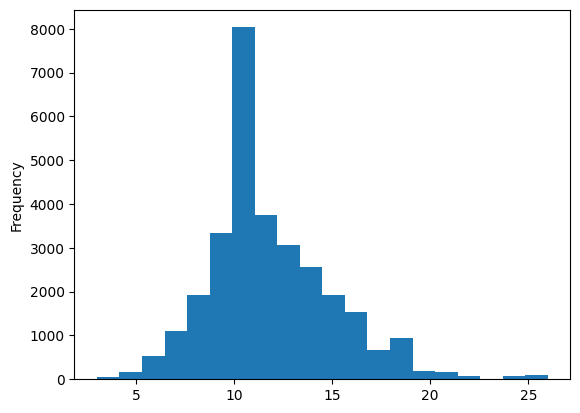

In [ ]:
train_df.total_lines.plot.hist(bins=20)

In [ ]:
np.percentile(train_df.total_lines, 98)

20.0

In [ ]:
train_line_number_one_hot.shape, train_total_lines_one_hot.ndim

(TensorShape([30212, 15]), 2)

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df.total_lines.to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df.total_lines.to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df.total_lines.to_numpy(), depth=20)

In [ ]:
# Token inputs
token_inputs = Input(shape=[], dtype='string')
token_embedding = embedding_layer(token_inputs)
token_output = Dense(128, activation='relu')(token_embedding)
token_model = Model(token_inputs, token_output)

# Char inputs
char_inputs = Input(shape=(1,), dtype='string')
char_vectors = char_vectorizer(char_inputs)
char_embedding = char_embed(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(char_embedding)
char_output = Dense(128, activation='relu')(char_bi_lstm)
char_model = Model(char_inputs, char_output)

# Line number inputs
line_number_inputs = Input(shape=(15,), dtype='float32')
line_number_output = Dense(32, activation='relu')(line_number_inputs)
line_number_model = Model(line_number_inputs, line_number_output)

# Total number inputs
total_lines_inputs = Input(shape=(20,), dtype='float32')
total_lines_output = Dense(32, activation='relu')(total_lines_inputs)
total_lines_model = Model(total_lines_inputs, total_lines_output)

combined_embedding = tf.keras.layers.Concatenate()([token_model.output, char_model.output])
z = Dense(128, activation='relu')(combined_embedding)
z = Dropout(0.5)(z)
tribrid_embedding = tf.keras.layers.Concatenate()([line_number_model.output, total_lines_model.output, z])
x = Dense(128, activation='relu')(tribrid_embedding)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_5 = Model([token_model.input, char_model.input, line_number_model.input, total_lines_model.input], outputs, name='model_5_token_char_embedding')

In [ ]:
model_5.summary()

Model: "model_5_token_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_30 (InputLayer)       [(None, 1)]                  0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 240)                  0         ['input_30[0][0]']            
 rization)                                                                                        
                                                                                                  
 input_29 (InputLayer)       [(None,)]                    0         []                            
                                                                                                  
 char_embedding (Embedding)  (None, 240, 25)              700       ['c

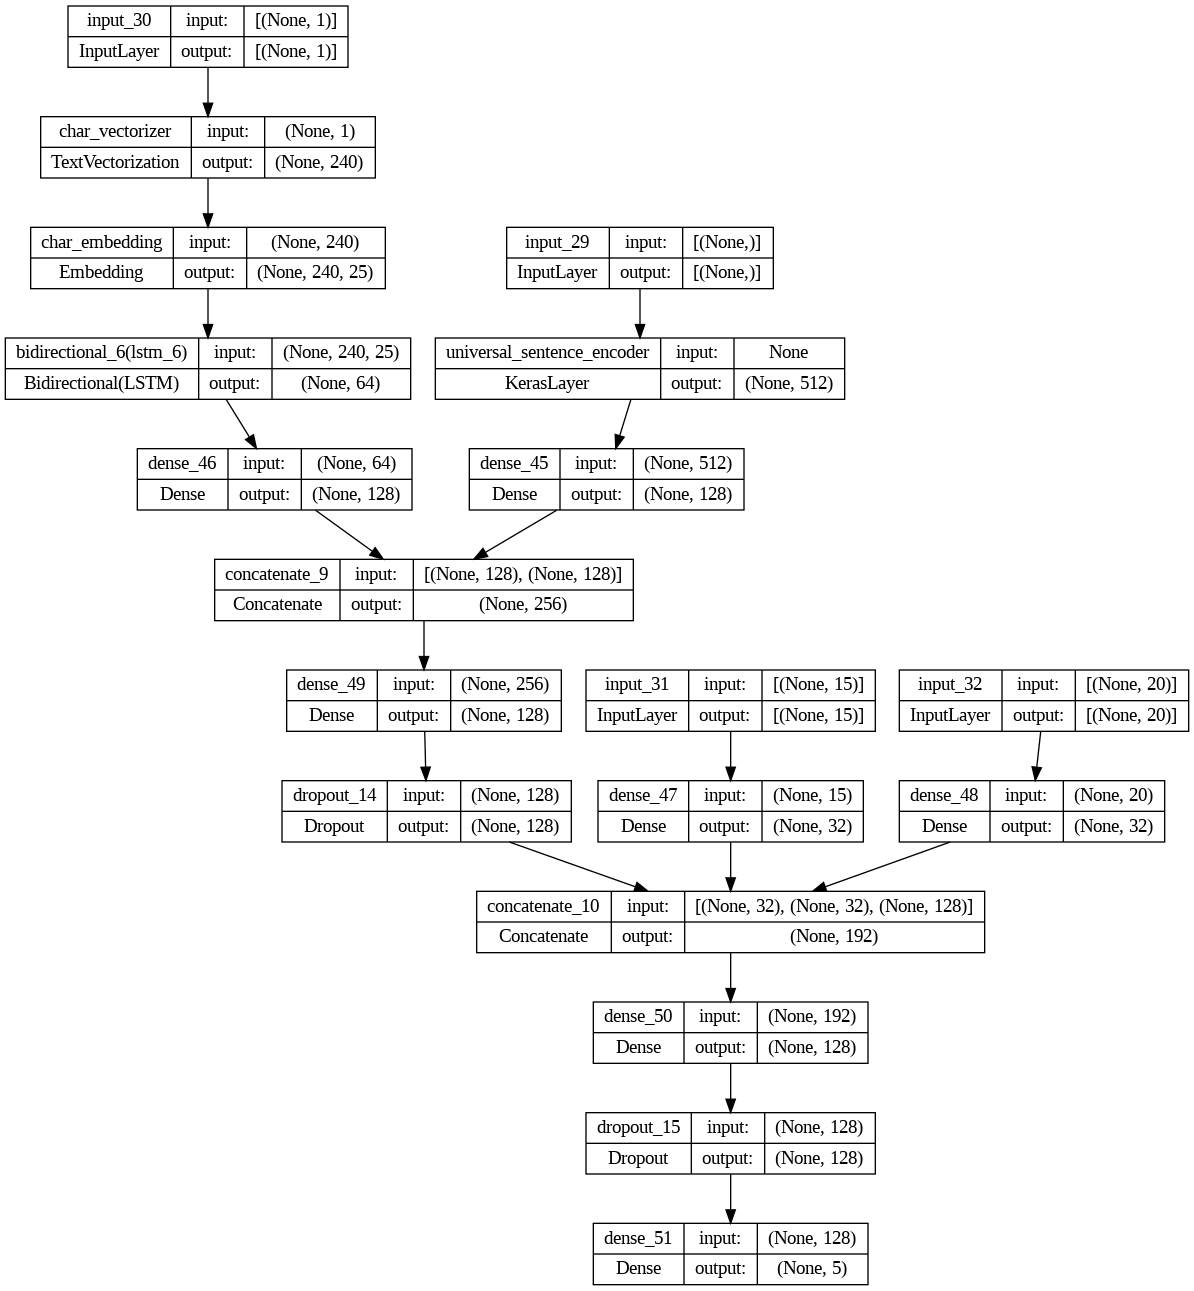

In [ ]:
plot_model(model_5, show_shapes=True)

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#### Preparing the dataset

In [ ]:
train_token_char_pos_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars, train_line_number_one_hot, train_total_lines_one_hot))
train_token_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_token_char_pos_dataset = tf.data.Dataset.zip((train_token_char_pos_data, train_token_char_pos_labels))
train_token_char_pos_dataset = train_token_char_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_token_char_pos_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars, val_line_number_one_hot, val_total_lines_one_hot))
val_token_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_token_char_pos_dataset = tf.data.Dataset.zip((val_token_char_pos_data, val_token_char_pos_labels))
val_token_char_pos_dataset = val_token_char_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_token_char_pos_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 1), dtype=tf.string, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
model_5_history = model_5.fit(train_token_char_pos_dataset,
                              epochs=3,
                              validation_data=val_token_char_pos_dataset,
                              validation_steps=int(0.15 * len(val_token_char_pos_dataset)))

Epoch 1/3
945/945 [==============================] - 256s 261ms/step - loss: 1.0476 - accuracy: 0.7508 - val_loss: 0.9375 - val_accuracy: 0.8231
Epoch 2/3
869/945 [==========================>...] - ETA: 18s - loss: 0.9351 - accuracy: 0.8357

In [ ]:
model_5_preds = model_5.predict(val_token_char_pos_dataset)
model_5_preds = tf.argmax(model_5_preds, axis=1)
model_5_results = calculate_results(y_true=val_labels_encoded,
                                      y_pred=model_5_preds)
model_5_results

## Save the model

In [ ]:
model_5.save('skimlit_tribrid_model')

In [ ]:
loaded_model_5 = tf.keras.models.load_model('skimlit_tribrid_model')